In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 4.3 MB/s 


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn_extra.cluster import KMedoids
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 8)
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
original = pd.read_csv('/content/drive/MyDrive/EM:IP/수정된 변수 폴더/1_GenerateVariables_3_merge.csv', sep=',')
original.head()

,Unnamed: 0,ID,cnt,time_A_total,time_b1,time_b2,time_B_total,time_start,time_end,time_total,credit,time_answer,time_not_answer,time_solving,events_num,avg_time_btw_events,sequence,length
0,1,ARE000018904852,ARE,0.0,0.0,0.0,0.0,8.9,3.8,40.8,0,0.0,28.1,28.1,3,9.366667,NaN,0
1,2,ARE000018904861,ARE,0.0,0.0,0.0,0.0,26.2,9.9,58.4,0,0.0,22.3,22.3,3,7.433333,NaN,0
2,3,ARE000018904843,ARE,0.0,0.0,0.0,0.0,29.8,9.9,59.3,0,0.0,19.6,19.6,8,2.450000,NaN,0
3,4,ARE000018904832,ARE,0.0,0.0,0.0,0.0,34.4,5.0,64.8,0,0.0,25.4,25.4,3,8.466667,NaN,0
4,5,ARE000040210135,ARE,0.0,0.0,0.0,0.0,143.3,16.9,181.6,0,0.0,21.4,21.4,4,5.350000,NaN,0


In [ ]:
os.chdir("D:\HYEM'S\GraduatedSchool\PROJECTS\MyProjects\ProcessMining_PISA2012\datasets")
print(os.getcwd())

FileNotFoundError: ignored

In [ ]:
original = pd.read_csv('./1_GenerateVariables_3_merge.csv')
original

,Unnamed: 0,ID,cnt,time_A_total,time_b1,time_b2,time_B_total,time_start,time_end,time_total,credit,time_answer,time_not_answer,time_solving,events_num,avg_time_btw_events,sequence,length
0,1,ARE000018904852,ARE,0.0,0.0,0.0,0.0,8.9,3.8,40.8,0,0.0,28.1,28.1,3,9.366667,NaN,0
1,2,ARE000018904861,ARE,0.0,0.0,0.0,0.0,26.2,9.9,58.4,0,0.0,22.3,22.3,3,7.433333,NaN,0
2,3,ARE000018904843,ARE,0.0,0.0,0.0,0.0,29.8,9.9,59.3,0,0.0,19.6,19.6,8,2.450000,NaN,0
3,4,ARE000018904832,ARE,0.0,0.0,0.0,0.0,34.4,5.0,64.8,0,0.0,25.4,25.4,3,8.466667,NaN,0
4,5,ARE000040210135,ARE,0.0,0.0,0.0,0.0,143.3,16.9,181.6,0,0.0,21.4,21.4,4,5.350000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30409,30410,USA000015004637,USA,25.8,11.5,0.0,11.5,19.8,2.5,64.0,1,37.3,4.4,41.7,10,4.170000,ab,2
30410,30411,USA000007902358,USA,35.9,12.9,0.0,12.9,24.7,6.4,81.3,1,48.8,1.4,50.2,8,6.275000,ab,2
30411,30412,USA000007902371,USA,33.3,15.8,0.0,15.8,11.9,12.5,74.4,1,49.1,0.9,50.0,11,4.545455,ab,2
30412,30413,USA000007902381,USA,9.1,5.9,0.0,5.9,11.3,4.4,95.4,1,15.0,64.7,79.7,35,2.277143,bab,3


In [ ]:
original[original.isnull().any(axis=1)]

,Unnamed: 0,ID,cnt,time_A_total,time_b1,time_b2,time_B_total,time_start,time_end,time_total,credit,time_answer,time_not_answer,time_solving,events_num,avg_time_btw_events,sequence,length
0,1,ARE000018904852,ARE,0.0,0.0,0.0,0.0,8.9,3.8,40.8,0,0.0,28.1,28.1,3,9.366667,NaN,0
1,2,ARE000018904861,ARE,0.0,0.0,0.0,0.0,26.2,9.9,58.4,0,0.0,22.3,22.3,3,7.433333,NaN,0
2,3,ARE000018904843,ARE,0.0,0.0,0.0,0.0,29.8,9.9,59.3,0,0.0,19.6,19.6,8,2.450000,NaN,0
3,4,ARE000018904832,ARE,0.0,0.0,0.0,0.0,34.4,5.0,64.8,0,0.0,25.4,25.4,3,8.466667,NaN,0
4,5,ARE000040210135,ARE,0.0,0.0,0.0,0.0,143.3,16.9,181.6,0,0.0,21.4,21.4,4,5.350000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30394,30395,USA000008902685,USA,0.0,0.0,0.0,0.0,17.2,8.6,33.4,0,0.0,7.6,7.6,3,2.533333,NaN,0
30399,30400,USA000015904920,USA,0.0,0.0,0.0,0.0,23.7,2.5,69.9,0,0.0,43.7,43.7,3,14.566667,NaN,0
30402,30403,USA000010403181,USA,0.0,0.0,0.0,0.0,32.8,3.7,79.6,0,0.0,43.1,43.1,3,14.366667,NaN,0
30403,30404,USA000010403168,USA,0.0,0.0,0.0,0.0,15.1,5.0,76.5,0,0.0,56.4,56.4,17,3.317647,NaN,0


In [ ]:
df = original[['ID','time_start','time_answer','time_not_answer','time_solving','avg_time_btw_events','length']]
df.set_index('ID', inplace=True)
df

,time_start,time_answer,time_not_answer,time_solving,avg_time_btw_events,length
ID,,,,,,
ARE000018904852,8.9,0.0,28.1,28.1,9.366667,0
ARE000018904861,26.2,0.0,22.3,22.3,7.433333,0
ARE000018904843,29.8,0.0,19.6,19.6,2.450000,0
ARE000018904832,34.4,0.0,25.4,25.4,8.466667,0
ARE000040210135,143.3,0.0,21.4,21.4,5.350000,0
...,...,...,...,...,...,...
USA000015004637,19.8,37.3,4.4,41.7,4.170000,2
USA000007902358,24.7,48.8,1.4,50.2,6.275000,2
USA000007902371,11.9,49.1,0.9,50.0,4.545455,2


In [ ]:
df = df[np.isfinite(df).all(1)]
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30273 entries, ARE000018904852 to USA000007902365
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time_start           30273 non-null  float64
 1   time_answer          30273 non-null  float64
 2   time_not_answer      30273 non-null  float64
 3   time_solving         30273 non-null  float64
 4   avg_time_btw_events  30273 non-null  float64
 5   length               30273 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.6+ MB


In [ ]:
df_2 = df[['time_start','length','avg_time_btw_events']]
df_2

,time_start,length,avg_time_btw_events
ID,,,
ARE000018904852,8.9,0,9.366667
ARE000018904861,26.2,0,7.433333
ARE000018904843,29.8,0,2.450000
ARE000018904832,34.4,0,8.466667
ARE000040210135,143.3,0,5.350000
...,...,...,...
USA000015004637,19.8,2,4.170000
USA000007902358,24.7,2,6.275000
USA000007902371,11.9,2,4.545455


In [ ]:
x = df_2.to_numpy()
x = RobustScaler().fit_transform(x)
df_scale = pd.DataFrame(x, columns = df_2.columns, index = df_2.index)
df_scale

,time_start,length,avg_time_btw_events
ID,,,
ARE000018904852,-0.641791,0.0,1.619043
ARE000018904861,0.649254,0.0,1.074790
ARE000018904843,0.917910,0.0,-0.328067
ARE000018904832,1.261194,0.0,1.365684
ARE000040210135,9.388060,0.0,0.488311
...,...,...,...
USA000015004637,0.171642,1.0,0.156130
USA000007902358,0.537313,1.0,0.748708
USA000007902371,-0.417910,1.0,0.261824


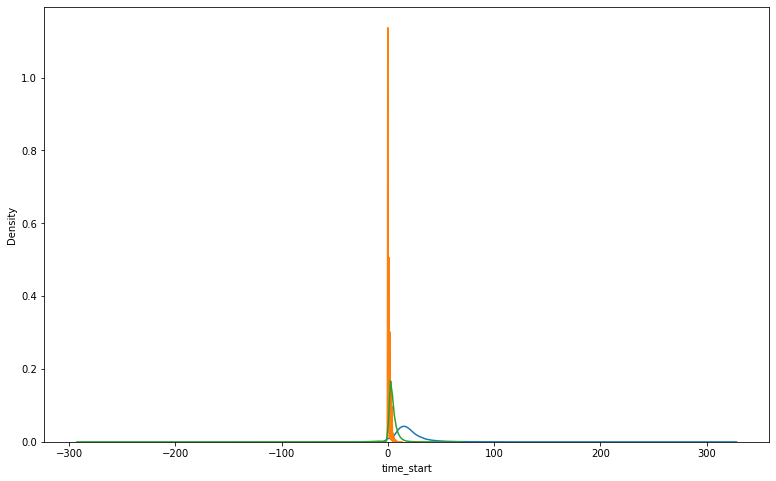

In [ ]:
sns.kdeplot(df['time_start'])
sns.kdeplot(df['length'])
sns.kdeplot(df['avg_time_btw_events'])

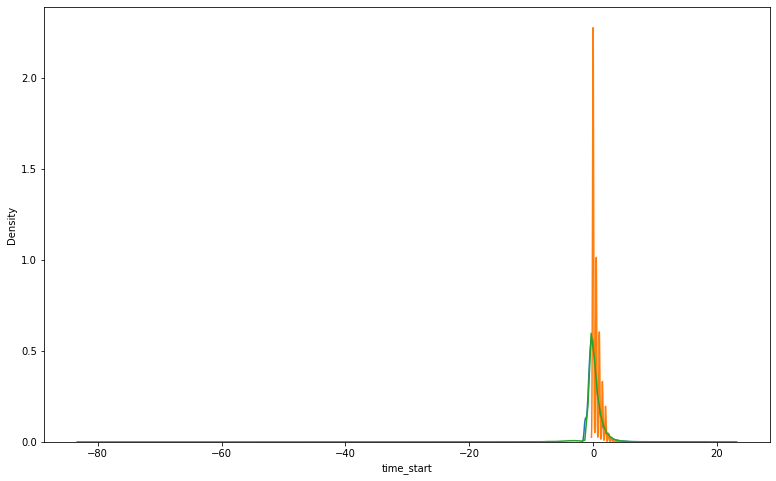

In [ ]:
sns.kdeplot(df_scale['time_start'])
sns.kdeplot(df_scale['length'])
sns.kdeplot(df_scale['avg_time_btw_events'])

 21%|██▏       | 3/14 [03:57<15:36, 85.14s/it]/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
 29%|██▊       | 4/14 [06:07<17:08, 102.88s/it]/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
 36%|███▌      | 5/14 [07:24<13:59, 93.27s/it] /usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
 43%|████▎     | 6/14 [09:01<12:38, 94.84s/it]/usr/local/lib/python3.7/dist-packages/sklearn_ex

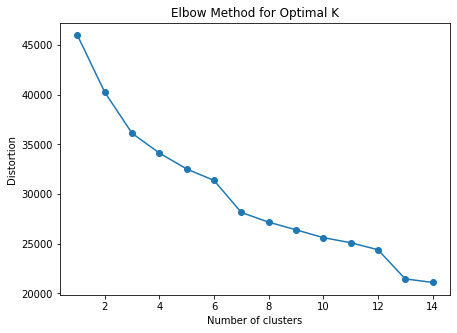

In [ ]:
distortions = []
for i in tqdm(range(1, 15)):
    kmedoids = KMedoids(n_clusters=i, random_state=0).fit(x)
    #inertia가 군집 내의 분산을 의미
    distortions.append(kmedoids.inertia_)

# plot
plt.figure(figsize=(7,5))
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
num = 13
kmedoids = KMedoids(n_clusters=num, random_state=0).fit(x)
print(kmedoids.labels_)

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)


[1 3 0 ... 4 6 0]


In [ ]:
df_scale['cluster'] = kmedoids.labels_
df_scale

,time_start,length,avg_time_btw_events,cluster
ID,,,,
ARE000018904852,-0.641791,0.0,1.619043,1
ARE000018904861,0.649254,0.0,1.074790,3
ARE000018904843,0.917910,0.0,-0.328067,0
ARE000018904832,1.261194,0.0,1.365684,3
ARE000040210135,9.388060,0.0,0.488311,5
...,...,...,...,...
USA000015004637,0.171642,1.0,0.156130,4
USA000007902358,0.537313,1.0,0.748708,3
USA000007902371,-0.417910,1.0,0.261824,4


# 두 변수 상관이 너무 높음

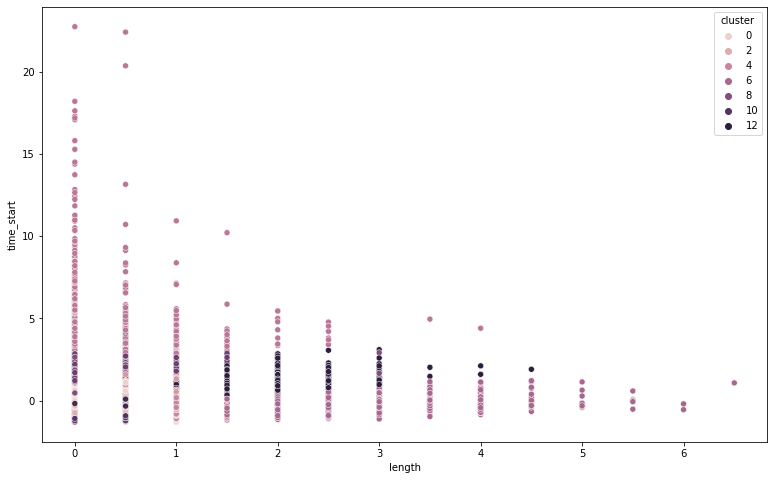

In [ ]:
sns.scatterplot(data=df_scale, x="length", y="time_start", hue="cluster")

Text(0.5, 0, 'length')

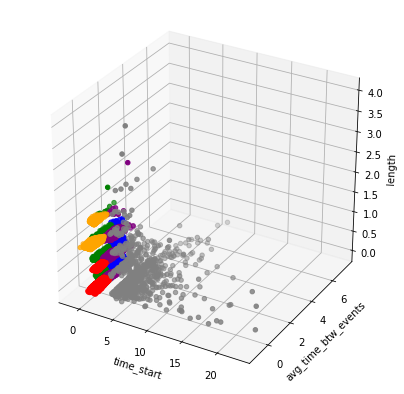

In [ ]:
# 3차원 코드 참고
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['r','b','g','purple','orange','gray']

for i, color in enumerate(colors):
    x = df_scale[df_scale['cluster'] == i]['time_start']
    y = df_scale[df_scale['cluster'] == i]['avg_time_btw_events']
    z = df_scale[df_scale['cluster'] == i]['length']
    ax.scatter(x,y,z,c=color,marker='o')

ax.set_xlabel('time_start')
ax.set_ylabel('avg_time_btw_events')
ax.set_zlabel('length')

In [ ]:
start time, squence 갯수, avg
not_answertime, avg, squence 갯수
